<a href="https://colab.research.google.com/github/rahul-2211/SparkDonate/blob/main/GRIP_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-2**  Prediction using Unsupervised ML

In [45]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Scatter Plot 

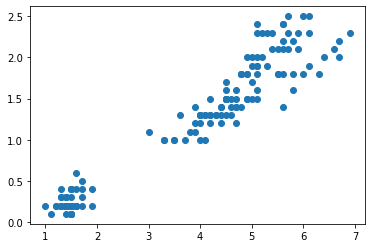

In [48]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])

In [49]:
df1=df.drop('SepalLengthCm',axis='columns')
df1=df1.drop('SepalWidthCm',axis='columns')
df1=df1.drop('Species',axis='columns')



In [50]:
df1.head()

,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2


In [51]:
km =KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
y_predicted = km.fit_predict(df1[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [53]:
df1['cluster']=y_predicted
df1

,Id,PetalLengthCm,PetalWidthCm,cluster
0,1,1.4,0.2,1
1,2,1.4,0.2,1
2,3,1.3,0.2,1
3,4,1.5,0.2,1
4,5,1.4,0.2,1
...,...,...,...,...
145,146,5.2,2.3,2
146,147,5.0,1.9,2
147,148,5.2,2.0,2
148,149,5.4,2.3,2


In [54]:
df1['cluster'].value_counts()

0    52
1    50
2    48
Name: cluster, dtype: int64

In [55]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

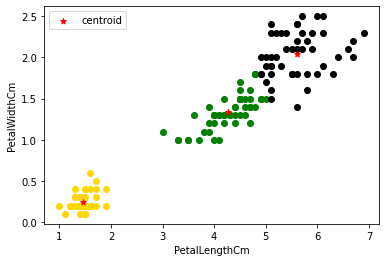

In [56]:
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]
df4 = df1[df1.cluster==2]

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='gold')
plt.scatter(df4['PetalLengthCm'],df4['PetalWidthCm'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')

plt.legend()

In [57]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km =KMeans(n_clusters=k)
  km.fit(df1[['PetalLengthCm','PetalWidthCm']])
  sse.append(km.inertia_)


In [58]:
sse

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.49940089968511,
 13.933308757908758,
 11.162107880813142,
 9.219714009661834,
 7.833345054945058,
 6.8328429320679325]

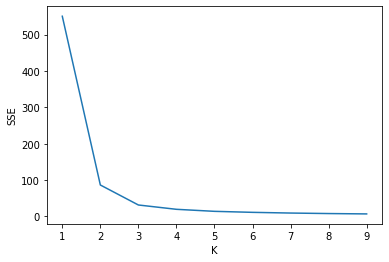

In [59]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)